In [184]:
import cmaps
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import netCDF4 as nc
import os
import xarray as xr
import glob
import sys
# sys.path.append('/DatadiskExt/xpji/CCKW_code/')
# import ma as mp
import pickle
import datetime
import pandas as pd
import calendar
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import matplotlib.ticker as ticker
import cartopy.feature as cfeature
from matplotlib.colors import LinearSegmentedColormap
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from statsmodels.tsa.stattools import acf

import time  # 导入 time 模块

Time taken by auto2: 0.001860 seconds
Time taken by acf_by_hand: 0.000839 seconds
Time taken by acf: 0.000565 seconds


<Figure size 1280x960 with 0 Axes>

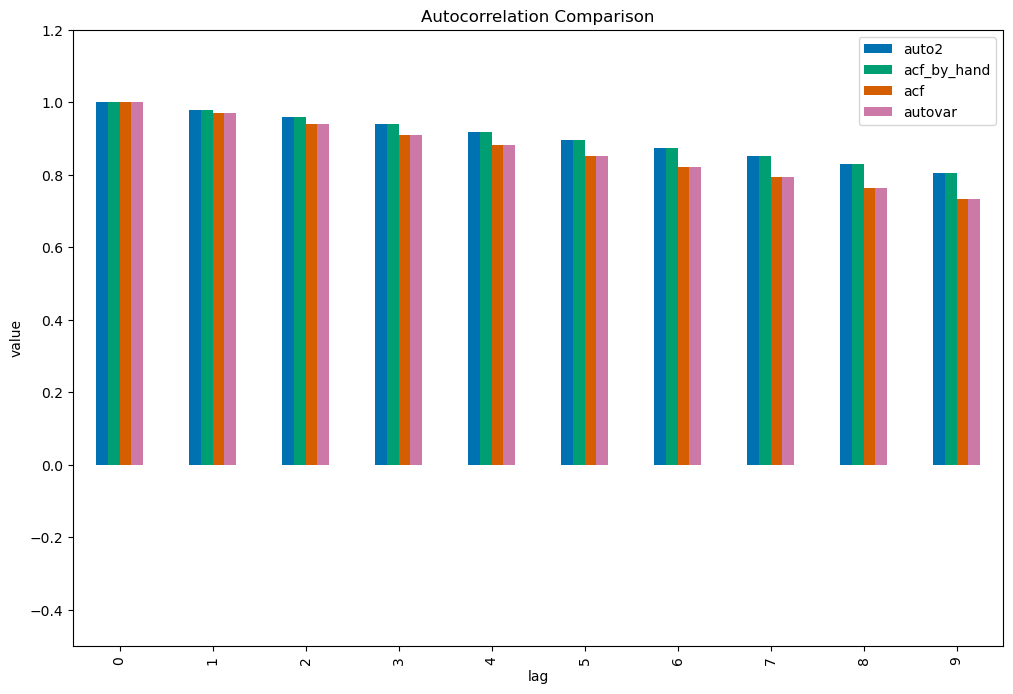

In [ ]:
def autocovariance(x, lag):
    """
    计算给定滞后期下的自协方差
    """
    n = len(x)
    mean_x = np.mean(x)
    # 计算自协方差
    cov = np.sum((x[:n-lag] - mean_x) * (x[lag:] - mean_x)) / n
    return cov

def autocorrelation_from_cov(x, lag):
    """
    通过自协方差计算自相关系数
    """
    var_x = np.var(x)  # 计算方差
    cov_lag = autocovariance(x, lag)  # 计算自协方差
    return cov_lag / var_x  # 标准化自协方差，得到自相关系数


# 自相关系数计算方法
def autocorrelation2(x, max_lag):
    n = len(x)
    mean_x = np.mean(x)  # 均值
    s = np.std(x, ddof=0)  # 标准差

    autocorr = np.zeros(max_lag + 1)  

    for j in range(max_lag + 1):
        autocorr[j] = np.sum((x[:n-j] - mean_x) * (x[j:] - mean_x)) / ((n - j) * s**2)

    return autocorr



def acf_by_hand(x, lag):
    y1 = x[:(len(x)-lag)]
    y2 = x[lag:]
    sum_product = np.sum((y1-np.mean(x))*(y2-np.mean(x)))
    return sum_product / ((len(x) - lag) * np.var(x))

x = np.linspace(0, 10, 101)

results = {}
lags = 10

# 记录每个方法的计算时间
times = {}

# 比较每个方法的自相关系数计算时间
start_time = time.perf_counter()
results["auto2"] = [autocorrelation2(x, lag)[lag] for lag in range(lags)]
times["auto2"] = time.perf_counter() - start_time

start_time = time.perf_counter()
results["acf_by_hand"] = [acf_by_hand(x, lag) for lag in range(lags)]
times["acf_by_hand"] = time.perf_counter() - start_time


start_time = time.perf_counter()
results["acf"] = acf(x, nlags=9)
times["acf"] = time.perf_counter() - start_time

results["autovar"] = [autocorrelation_from_cov(x, lag) for lag in range(lags)]

# 打印每个方法的计算时间
for method, elapsed_time in times.items():
    print(f"Time taken by {method}: {elapsed_time:.6f} seconds")

# 对比不同方法的计算结果
plt.figure(dpi=200)
pd.DataFrame(results).plot(kind="bar", figsize=(12,8), )
plt.xlabel("lag")
plt.ylim([-.5, 1.2])
plt.ylabel("value")
plt.title("Autocorrelation Comparison")

plt.show()


In [186]:
results

{'auto2': [1.0,
  0.9998000000000002,
  0.9995999600079986,
  0.9993998800239955,
  0.9991997600479907,
  0.9989996000799842,
  0.998799400119976,
  0.9985991601679666,
  0.9983988802239555,
  0.9981985602879425],
 'acf_by_hand': [1.0,
  0.9998000000000002,
  0.9995999600079986,
  0.9993998800239955,
  0.9991997600479907,
  0.9989996000799842,
  0.998799400119976,
  0.9985991601679666,
  0.9983988802239555,
  0.9981985602879425],
 'acf': array([1.        , 0.99970003, 0.99940006, 0.99910009, 0.99880012,
        0.99850015, 0.99820018, 0.99790021, 0.99760024, 0.99730027]),
 'autovar': [1.0,
  0.9997000299970004,
  0.9994000600059972,
  0.9991000900389868,
  0.9988001201079655,
  0.9985001502249298,
  0.9982001804018759,
  0.9979002106508007,
  0.9976002409837004,
  0.9973002714125709]}